In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('files/fruits.csv')
df

,weight,sweetness level,label
0,180,7,Apple
1,200,6,Apple
2,150,4,Orange
3,170,5,Orange
4,160,6,Apple
5,140,3,Orange


In [3]:
def euclid(x,y):
    return ((x[0]-y[0]) ** 2 + (x[1]-y[1]) ** 2) ** 0.5

def manhattan(x,y):
    return abs(x[0]-y[0]) + abs(x[1]-y[1])

def mink(x,y,p):
    return ((x[0]-y[0]) ** p + (x[1]-y[1]) ** p) ** p

In [28]:
new_weight = 165
new_sweet = 5.5
k = 3

In [66]:
# df['distance'] = euclid((df['weight'],df['sweetness level']),(165,5.5))

df['distance'] = df.apply(lambda row :  euclid((row['weight'],row['sweetness level']),(new_weight,new_sweet)),axis=1)

In [6]:
df

,weight,sweetness level,label,distance
0,180,7,Apple,15.074813
1,200,6,Apple,35.003571
2,150,4,Orange,15.074813
3,170,5,Orange,5.024938
4,160,6,Apple,5.024938
5,140,3,Orange,25.124689


In [7]:
df = df.sort_values(by='distance',ascending=True)
df

,weight,sweetness level,label,distance
3,170,5,Orange,5.024938
4,160,6,Apple,5.024938
0,180,7,Apple,15.074813
2,150,4,Orange,15.074813
5,140,3,Orange,25.124689
1,200,6,Apple,35.003571


In [29]:
df_sliced = df[:k]
df_sliced

,weight,sweetness level,label,distance
3,170,5,Orange,5.024938
4,160,6,Apple,5.024938
0,180,7,Apple,15.074813


In [45]:
counts = df_sliced.value_counts('label')
print(counts)
new = counts.idxmax()
print(new)

label
Apple     2
Orange    1
Name: count, dtype: int64
Apple


In [35]:
w = df['weight'].values
s = df['sweetness level'].values   
l = df['label'].values
w,s,l 

(array([170, 160, 180, 150, 140, 200], dtype=int64),
 array([5, 6, 7, 4, 3, 6], dtype=int64),
 array(['Orange', 'Apple', 'Apple', 'Orange', 'Orange', 'Apple'],
       dtype=object))

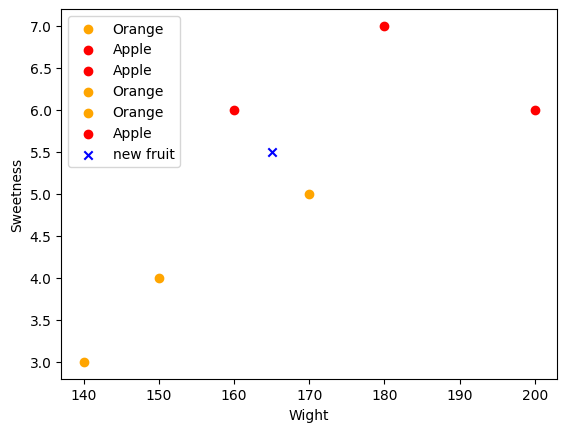

In [43]:
for weight, sweetness, label in zip(w,s,l):
    color = 'red' if label=="Apple" else 'orange'
    plt.scatter(weight,sweetness,color=color,label=label)
plt.scatter(new_weight,new_sweet,color='blue',marker='x',label="new fruit")
plt.xlabel("Wight")
plt.ylabel("Sweetness")
plt.legend()
plt.show()

In [76]:
data = {
    'Acid' : [7,7,3,1,4,3,4,8,7,8],
    'strength' : [7,4,4,4,5,5,6,7,9,8],
    'classification' : ['bad','bad','good','good','bad','good','bad','bad','good','bad']
}

data = pd.DataFrame(data)
data

,Acid,strength,classification
0,7,7,bad
1,7,4,bad
2,3,4,good
3,1,4,good
4,4,5,bad
5,3,5,good
6,4,6,bad
7,8,7,bad
8,7,9,good
9,8,8,bad


In [81]:
def knn(new_point,k):
    # data['distance'] = data.apply(lambda row : euclid((row['Acid durability'],row['strength']),new_point),axis=1)
    data['distance'] = euclid((data['Acid'],data['strength']),new_point)
    data_sorted = data.sort_values(by='distance',ascending=True)
    data_sliced = data_sorted[:k]
    counts = data_sliced['classification'].value_counts()
    return counts.idxmax()

In [82]:
new_acid = 3
new_strength = 7
new_point = (new_acid,new_strength)
ans = knn(new_point,3)


In [83]:
data

,Acid,strength,classification,distance
0,7,7,bad,4.000000
1,7,4,bad,5.000000
2,3,4,good,3.000000
3,1,4,good,3.605551
4,4,5,bad,2.236068
5,3,5,good,2.000000
6,4,6,bad,1.414214
7,8,7,bad,5.000000
8,7,9,good,4.472136
9,8,8,bad,5.099020


In [84]:
ans

'bad'

## Final Merged Code with all functionalities 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
data = {
    'Acid': [7, 7, 3, 1, 4, 3, 4, 8, 7, 8],
    'strength': [7, 4, 4, 4, 5, 5, 6, 7, 9, 8],
    'classification': ['bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad']
}
data = pd.DataFrame(data)

# Step 2: Define distance functions
def euclidean(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def manhattan(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def minkowski(p1, p2, p=3):
    return (abs(p1[0] - p2[0])**p + abs(p1[1] - p2[1])**p) ** (1/p)

In [8]:
def knn(new_point, k, distance_metric='euclidean', p=3):
    # Compute distance based on the selected metric
    if distance_metric == 'euclidean':
        data['distance'] = data.apply(lambda row: euclidean((row['Acid'], row['strength']), new_point), axis=1)
    elif distance_metric == 'manhattan':
        data['distance'] = data.apply(lambda row: manhattan((row['Acid'], row['strength']), new_point), axis=1)
    elif distance_metric == 'minkowski':
        data['distance'] = data.apply(lambda row: minkowski((row['Acid'], row['strength']), new_point, p=p), axis=1)
    else:
        raise ValueError("Unsupported distance metric. Choose from 'euclidean', 'manhattan', or 'minkowski'.")
    
    # Sort data by distance and select top k nearest neighbors
    data_sorted = data.sort_values(by='distance').reset_index(drop=True)
    neighbors = data_sorted[:k]
    
    # Get the most common classification among neighbors
    classification = neighbors['classification'].value_counts().idxmax()
    return classification, neighbors

In [9]:
def plot_knn(data, new_point, neighbors, k):
    # Plot data points
    plt.scatter(data['Acid'], data['strength'], c=data['classification'].map({'good': 'blue', 'bad': 'red'}), label='Data Points')
    # Highlight new point
    plt.scatter(new_point[0], new_point[1], color='green', label='New Point', marker='X', s=100)
    # Highlight k-nearest neighbors
    plt.scatter(neighbors['Acid'], neighbors['strength'], facecolors='none', edgecolors='black', s=100, label=f'{k} Neighbors')
    
    plt.xlabel('Acid')
    plt.ylabel('Strength')
    plt.legend()
    plt.title(f'KNN Classification with k={k}')
    plt.show()

The new point is classified as: bad


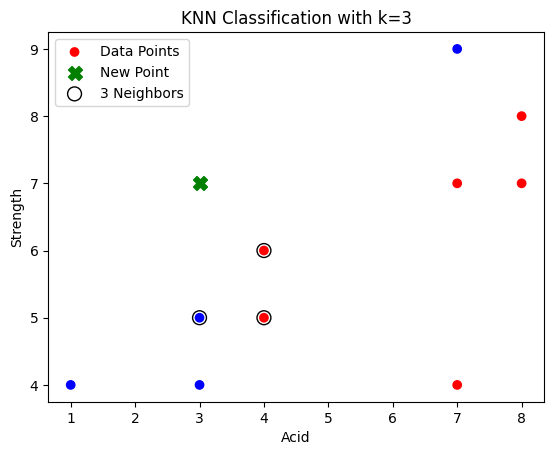

In [15]:
new_acid = 3
new_strength = 7
new_point = (new_acid, new_strength)
k = 3

# Run KNN to classify the new point
classification, neighbors = knn(new_point, k, distance_metric='euclidean')
print(f"The new point is classified as: {classification}")

# Plot the data with neighbors
plot_knn(data, new_point, neighbors, k)